Put realistic garbage in photos. Start with the simplest one, a paper on the road  
I first need to start by finding where I can place my garbage  
This notebook will work on placement logic

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

In [7]:
full_export = Path("/Users/hariomnarang/Downloads/project-6-at-2026-01-21-07-00-f63669d2.json")
DATASETS = Path("/Users/hariomnarang/Desktop/personal/roads/datasets")
EXP_BASE = DATASETS / "T002-synth"
IMAGE_DEST = EXP_BASE / "images"
BACKDROPS = EXP_BASE / "backdrops"

In [6]:
from mtrain.label_studio.extract_frags import prepare_image_folder

In [10]:
prepare_image_folder(14325, full_export, IMAGE_DEST)

PosixPath('/Users/hariomnarang/Desktop/personal/roads/datasets/T002-synth/images/14325')

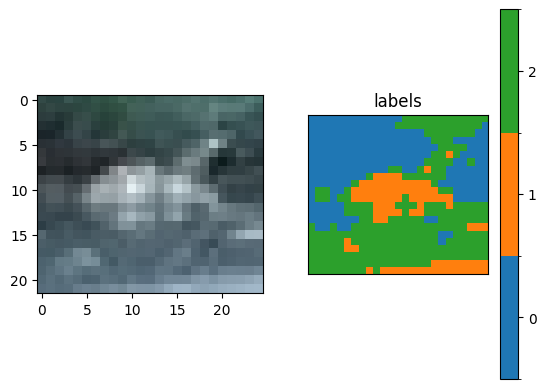

In [15]:
from mtrain.label_studio.extract_frags import run_kmeans, plot_kmeans_labels

fg = cv2.imread("/Users/hariomnarang/Desktop/Screenshot 2026-01-20 at 5.16.09 PM.png")
f, ax = plt.subplots(1, 2)
ax[0].imshow(fg)
lbl = run_kmeans(fg, 3)
plot_kmeans_labels(lbl, ax[1])
plt.show()

In [12]:
from mtrain.label_studio.extract_frags import extract_kmeans_label

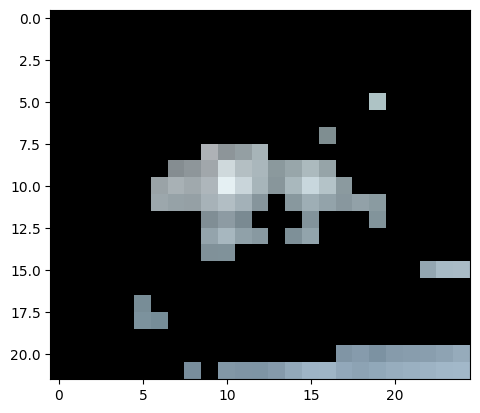

In [17]:
plt.imshow(extract_kmeans_label(fg, lbl, [1]))

In [2]:
IMAGE_BASE = Path("../../datasets/synth-expr")
images = list(IMAGE_BASE.rglob("*.jpeg"))

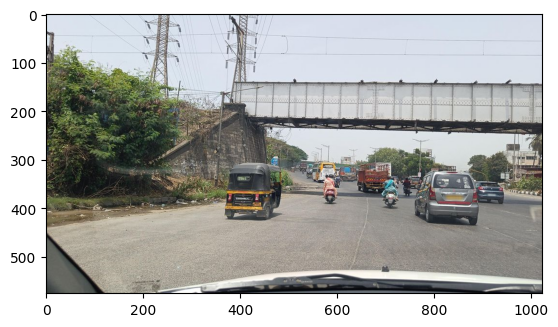

In [21]:
img = images[1]
plt.imshow(plt.imread(img))

In [11]:
from mtrain.yolo.predict import predict_image


In [ ]:
from ultralytics import YOLO

model = YOLO("./best.pt")

4


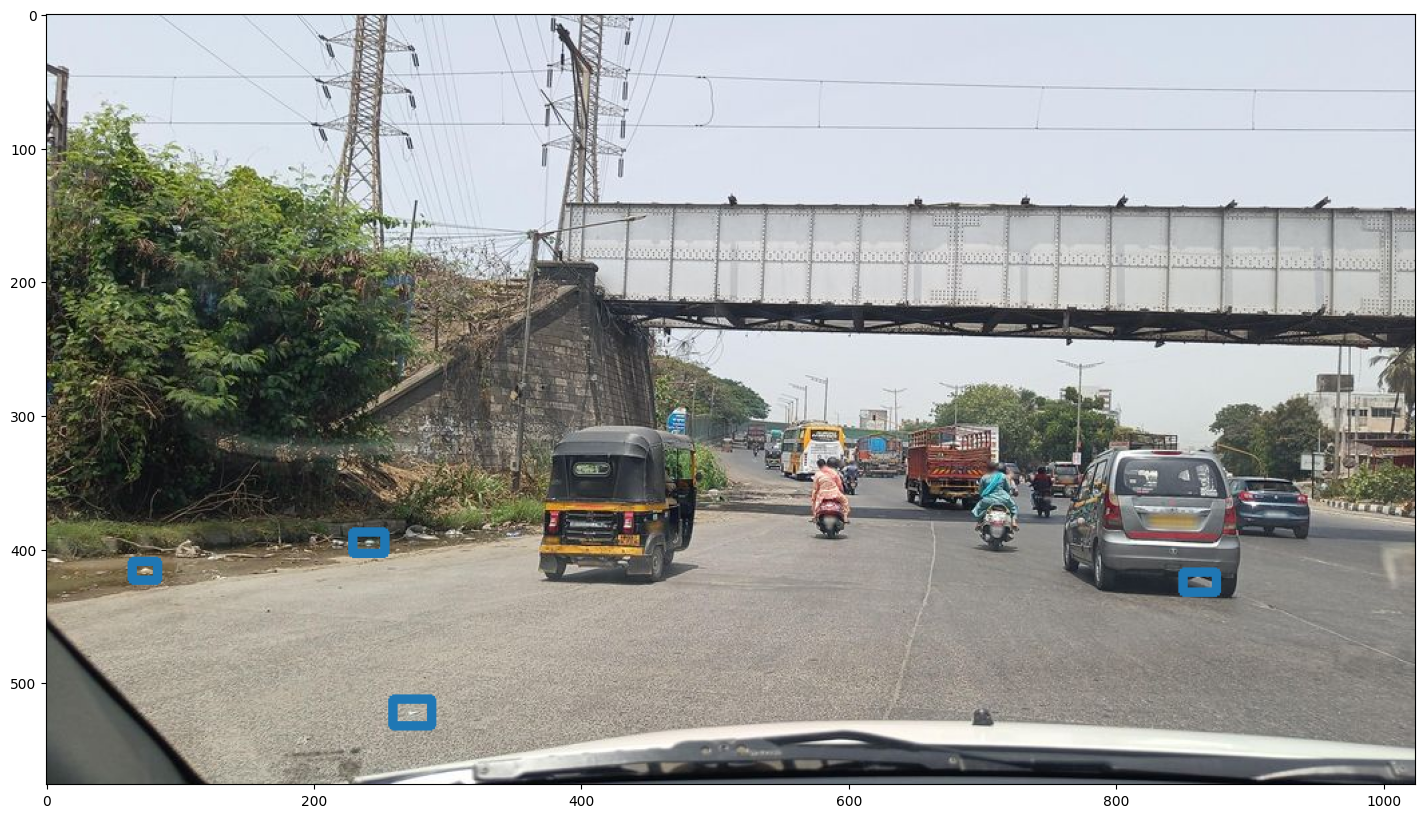

In [ ]:
res, boxes = predict_image(model, images[1])
print(boxes)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.imshow(res)

In [ ]:
from mtrain.label_studio.extract_frags import run_kmeans

In [ ]:
run_k

In [7]:
# use this cell for segmenting roads/ground/etc, finding placement for garbage

# from mtrain.seg.cityscapes import SegFormerCityScapes, CityScapesCls
# model = SegFormerCityScapes()
# p = "/Users/hariomnarang/Desktop/Screenshot 2026-01-11 at 11.38.45 PM.png"
# pred = model.predict(p)
# mask = model.get_mask(pred, CityScapesCls.ROAD)
# orig = cv2.imread(p)
# orig[mask] = [255,0,0]

# plt.imshow(orig)

In [1]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=5,
    min=0,
    max=10,
    step=1,
    description='Threshold:'
)
display(slider)

IntSlider(value=5, description='Threshold:', max=10)

In [3]:
from ipywidgets import interact

def f(threshold):
    print("Threshold =", threshold)

interact(f, threshold=(0, 255));

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/Users/hariomnarang/Desktop/personal/roads/datasets/T002-synth/images/14325/image.jpg", cv2.IMREAD_GRAYSCALE)

def show(th):
    _, mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

interact(show, th=(0, 255));

interactive(children=(IntSlider(value=127, description='th', max=255), Output()), _dom_classes=('widget-intera…